Predict the Automobile Insurance claim

The purpose of an Insurance is to provide protection against the risk of any financial loss. Insurance is a form of risk management in which an insurer agrees to take the risk of the insured entity against future events, uncertain loss due to Tsunami, earthquake or damage against the vehicle or personal property. Here we are provided with Automobile insurance claim dataset.

Let's predict the claim amount in the Automobile insurance dataset based on the given features.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline

In [2]:
auto=pd.read_csv('Auto_Insurance_Claims_amount.csv')

In [3]:
# Let's see the automobile insurance claim dataset
auto.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [4]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception  

In [5]:
# Let's see the shape of the datasest
auto.shape

(9134, 26)

In [6]:
# Lets see the null values
auto.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [7]:
# Let's see the nan values 
auto.isna().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

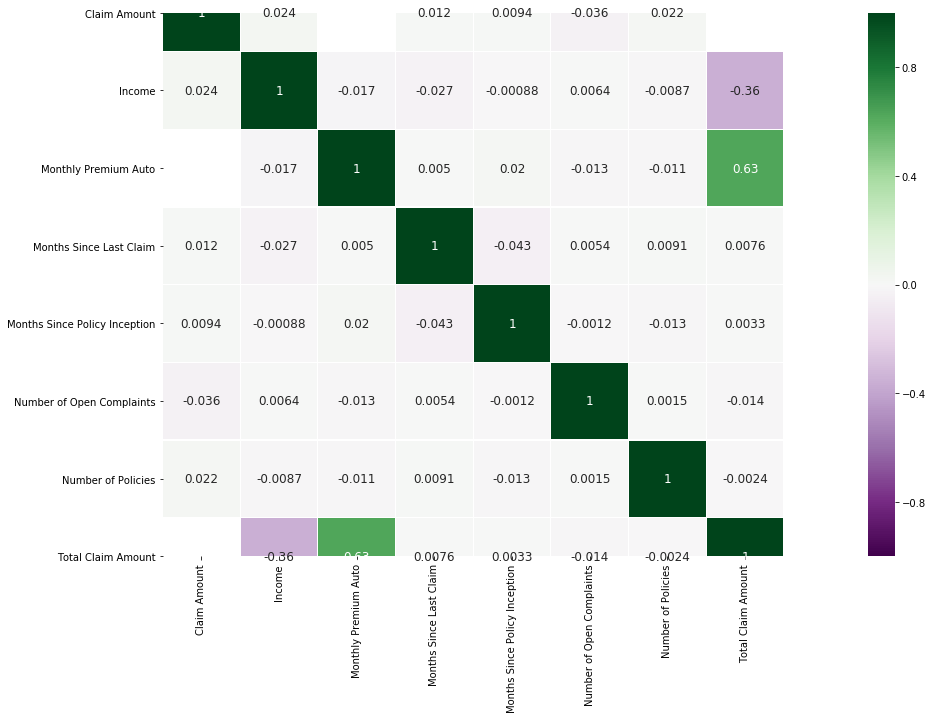

In [8]:
# Analysis the correlation in the HR dataset
auto_corr = auto.corr()

plt.figure(figsize=(30, 10))

sns.heatmap(auto_corr[(auto_corr >= 0.4) | (auto_corr <= 0.2)], 
            cmap='PRGn', vmax=1.0, vmin=-1.0, linewidths=0.2,
            annot=True, annot_kws={"size": 12}, square=True)
plt.show()

# Data is not correlated 

In [9]:
#list the columns names
auto.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

<Figure size 3240x1080 with 0 Axes>

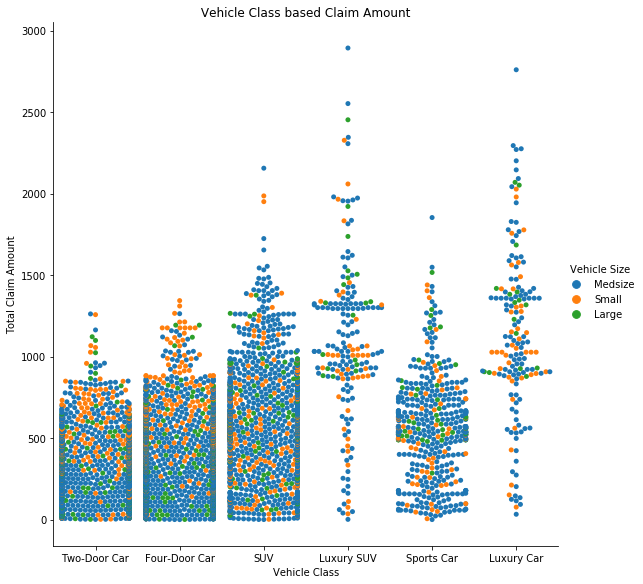

In [10]:
# Plot Total Claim Amount based on Vehicle Class and Vehicle Size
plt.figure(figsize=(45, 15))
sns.catplot(x="Vehicle Class", y="Total Claim Amount", data=auto, kind="swarm", 
            hue= 'Vehicle Size', height=8, aspect=1)
                                                     
plt.title(' Vehicle Class based Claim Amount ') 
plt.show()

This representation shows "Large Vechile" class has fewer claims. Major claims have been done by medium size Vechicles. Substantial claim has been claimed SUV Vechile Class followed bt Four-Door Cars. 

<Figure size 4680x2520 with 0 Axes>

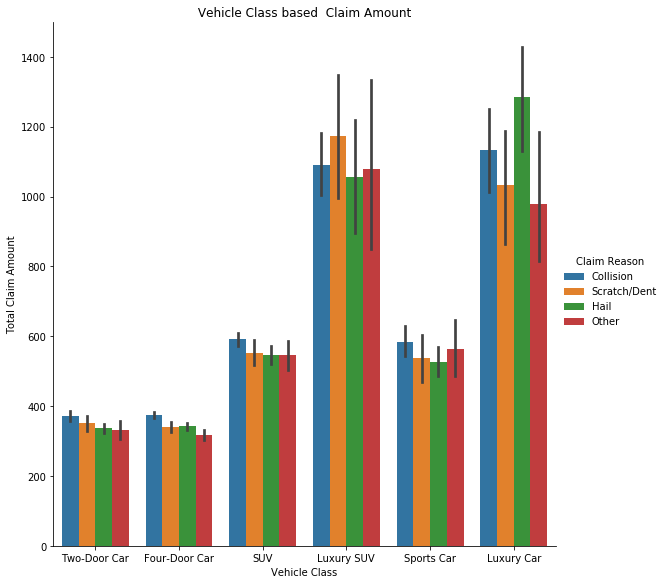

In [11]:
# Plot Total Claim Amount based on Vehicle Class and Vehicle Size
plt.figure(figsize=(65, 35))
sns.catplot(x="Vehicle Class", y="Total Claim Amount", data=auto, kind="bar", 
            hue= 'Claim Reason', height=8, aspect=1)
                                                     
plt.title(' Vehicle Class based  Claim Amount ') 
plt.show()

Text(0.5, 1.0, ' Vehicle Class Distribution Across Coverage ')

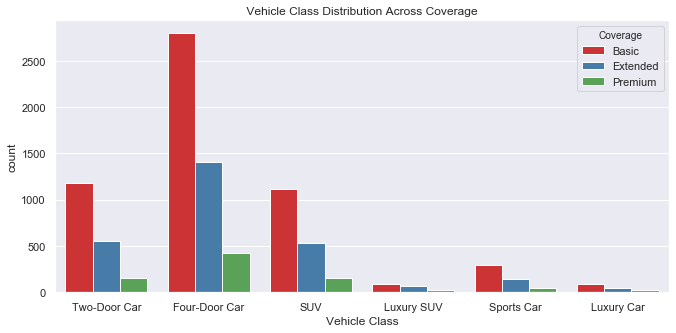

In [12]:
sns.set(rc={'figure.figsize':(11,5)})
auto_c=auto['Vehicle Class']
sns.countplot(x=auto_c, data=auto, hue= 'Coverage', palette="Set1")
plt.title(" Vehicle Class Distribution Across Coverage ")

Majority of the automobile having basic "Coverage Policy" from the company 

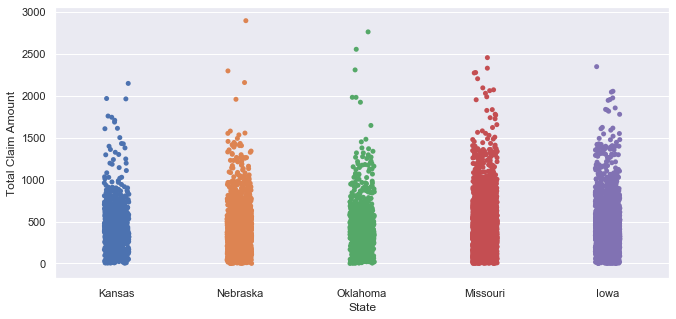

In [13]:
# Let's see which state has highest Total claim amount
sns.stripplot(x="State", y="Total Claim Amount", data=auto) 

Missouri followed by Lowa and Nebraska claimed highest.

In [14]:
auto.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [15]:
# Data Pre-processing for training and evaluation purposes 
auto_df=auto.drop(['Customer', 'Response', 'Country', 'State Code', 'State', 'Effective To Date', 
                   'Location Code', 'Education', 'Policy Type', 
                   'Policy', 'Marital Status', 'Gender', 'Sales Channel'], axis=1)

In [16]:
auto_df.head()

,Claim Amount,Coverage,EmploymentStatus,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Claim Reason,Total Claim Amount,Vehicle Class,Vehicle Size
0,276.351928,Basic,Employed,56274,69,32,5,0,1,Collision,384.811147,Two-Door Car,Medsize
1,697.953590,Extended,Unemployed,0,94,13,42,0,8,Scratch/Dent,1131.464935,Four-Door Car,Medsize
2,1288.743165,Premium,Employed,48767,108,18,38,0,2,Collision,566.472247,Two-Door Car,Medsize
3,764.586183,Basic,Unemployed,0,106,18,65,0,7,Collision,529.881344,SUV,Medsize
4,281.369258,Basic,Employed,43836,73,12,44,0,1,Collision,138.130879,Four-Door Car,Medsize


In [17]:
# Let's define the target class for the model training 
target=auto_df['Total Claim Amount']

In [18]:
auto_df_ = pd.get_dummies(auto_df)

In [19]:
auto_df_.shape

(9134, 29)

In [20]:
# Let's drop claim amount column from the dataset
auto_df_= auto_df_.drop(['Total Claim Amount'], axis=1)

In [21]:
# Lets use the standard Scaler to standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
feature = sc.fit_transform(auto_df_)
print(feature)

[[-0.76287773  0.61282744 -0.70392465 ... -0.33990429  0.64950407
  -0.48923278]
 [-0.14924546 -1.23961684  0.02269103 ... -0.33990429  0.64950407
  -0.48923278]
 [ 0.71063622  0.36570978  0.42959581 ... -0.33990429  0.64950407
  -0.48923278]
 ...
 [ 0.02313483 -1.23961684 -0.23889062 ... -0.33990429  0.64950407
  -0.48923278]
 [-0.06993547 -0.51735647  0.08082028 ...  2.94200461 -1.53963622
  -0.48923278]
 [-0.78495478 -1.23961684 -0.47140763 ... -0.33990429  0.64950407
  -0.48923278]]


In [22]:
# Reshape the target variable 
target=auto_df['Total Claim Amount'].values.reshape(-1,1)
print(target)

[[ 384.811147]
 [1131.464935]
 [ 566.472247]
 ...
 [ 790.784983]
 [ 691.2     ]
 [ 369.6     ]]


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.30)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

models = []

models.append(("Linear Regression",LinearRegression()))
models.append(("Lasso",Lasso()))
models.append(("Ridge",Ridge()))
models.append(("Elastic Net",ElasticNet()))
models.append(("KNN",KNeighborsRegressor(n_neighbors=6)))

***************************** Linear Regression ***********************************************


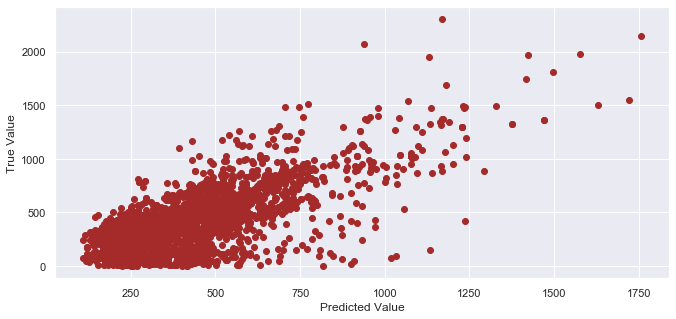

RMSE for Training  Dataset : 196.85468282881328
RMSE for Testing Dataset: 192.86267520798657
***************************** Lasso ***********************************************


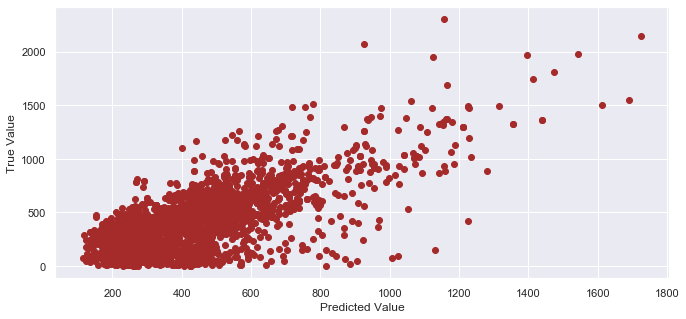

RMSE for Training  Dataset : 196.84488212496316
RMSE for Testing Dataset: 193.02688107769208
***************************** Ridge ***********************************************


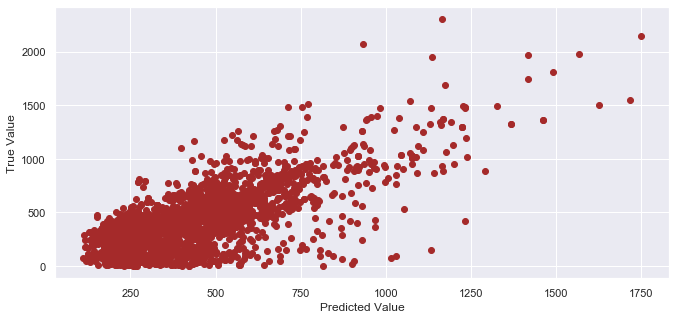

RMSE for Training  Dataset : 196.7882853857242
RMSE for Testing Dataset: 192.91718843243925
***************************** Elastic Net ***********************************************


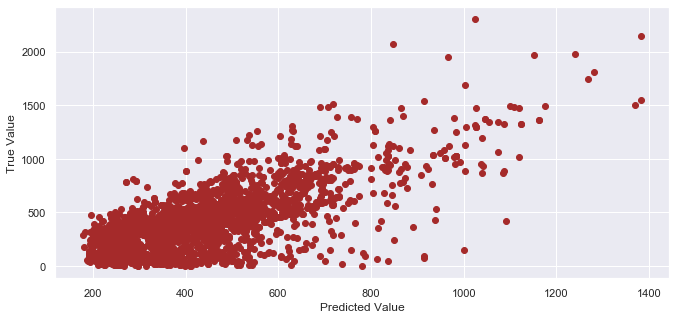

RMSE for Training  Dataset : 201.9928047294246
RMSE for Testing Dataset: 196.26727730671786
***************************** KNN ***********************************************


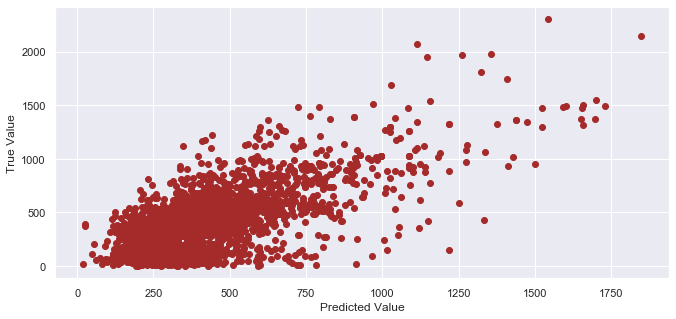

RMSE for Training  Dataset : 169.9044178522217
RMSE for Testing Dataset: 203.24904234383928


In [25]:
result = []
names = []
for name,model in models:
    print('*****************************', name, '***********************************************')
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    #Plot the distribution of the Preedicted and True
    plt.scatter(pred, y_test, color='brown')
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    plt.show()
    
    # predicting on training data-set
    y_train_pred = model.predict(x_train)
    # Print Scores for each of the Predicting model
    
    print('RMSE for Training  Dataset :', np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
    print('RMSE for Testing Dataset:', np.sqrt(metrics.mean_squared_error(y_test, pred)))